<a href="https://colab.research.google.com/github/markhayes0811/Stock/blob/main/EDAProject_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (Optional) if you keep data on Drive
from google.colab import drive
drive.mount('/content/drive')

Imports and config

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make plots bigger by default
plt.rcParams['figure.figsize'] = (8, 4)

Load the Data

In [2]:
# UCI red‑wine dataset (semicolon‑delimited)
DATA_URL = (
  "https://archive.ics.uci.edu/ml/"
  "machine-learning-databases/wine-quality/"
  "winequality-red.csv"
)
df = pd.read_csv(DATA_URL, sep=';')


Quick Data Inspection

In [3]:
print(f"Shape: {df.shape}")      # rows × columns
df.head()                        # preview first 5 rows

df.info()                        # types & non‑null counts
df.describe()                   # summary stats for numeric cols

Shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Missing Values & Cleaning

In [4]:
# Check for nulls
null_counts = df.isna().sum()
print(null_counts[null_counts > 0])

# No nulls here—but if there were:
# df['some_col'].fillna(df['some_col'].median(), inplace=True)

Series([], dtype: int64)


#Univariate Analysis

Quality Distribution

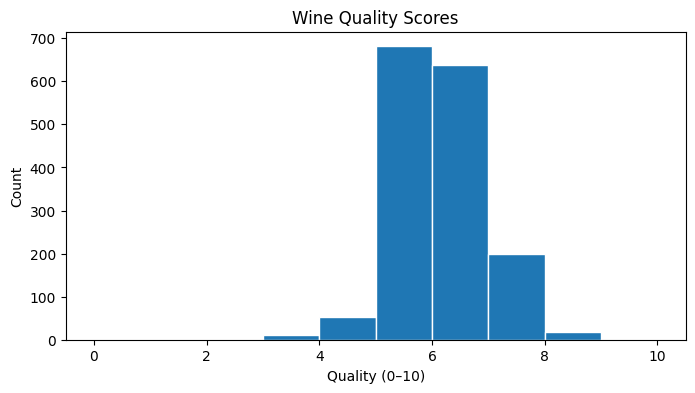

In [5]:
plt.hist(df['quality'], bins=range(0,11), edgecolor='w')
plt.title("Wine Quality Scores")
plt.xlabel("Quality (0–10)")
plt.ylabel("Count")
plt.show()

Alcohol Content

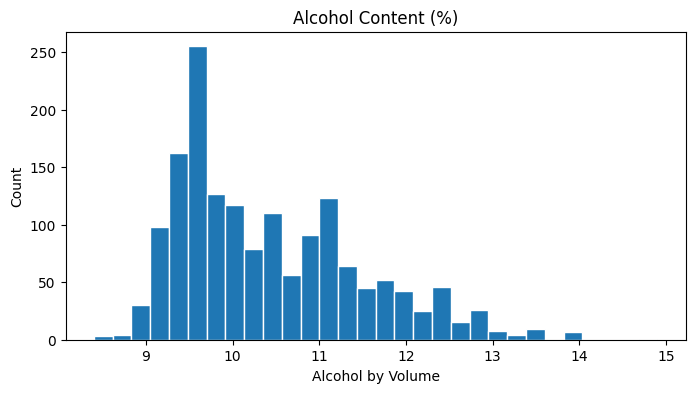

In [6]:
plt.hist(df['alcohol'], bins=30, edgecolor='w')
plt.title("Alcohol Content (%)")
plt.xlabel("Alcohol by Volume")
plt.ylabel("Count")
plt.show()

# Bivariate Analysis

Quality vs. Alcohol

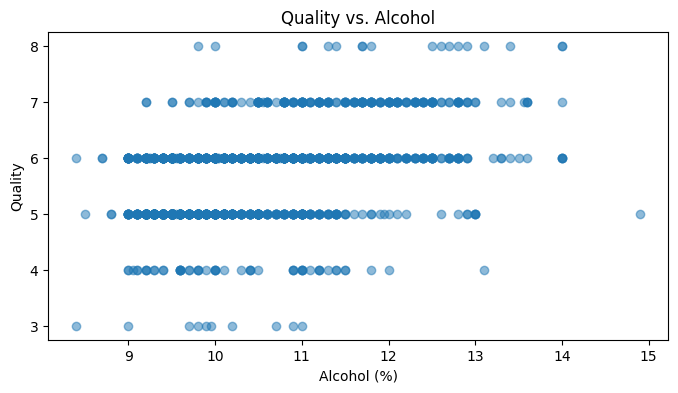

In [7]:
plt.scatter(df['alcohol'], df['quality'], alpha=0.5)
plt.title("Quality vs. Alcohol")
plt.xlabel("Alcohol (%)")
plt.ylabel("Quality")
plt.show()

Acidity vs. Quality

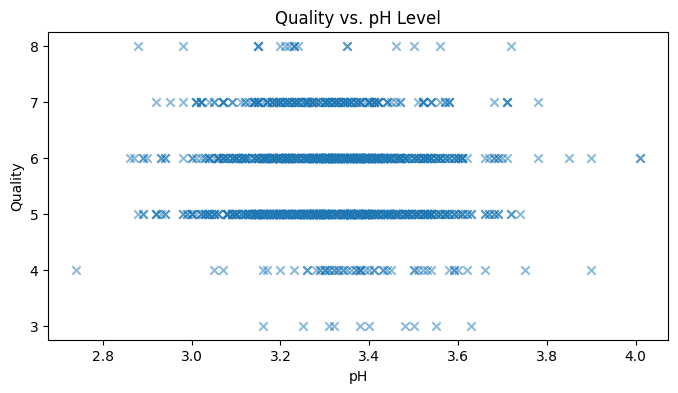

In [8]:
plt.scatter(df['pH'], df['quality'], alpha=0.5, marker='x')
plt.title("Quality vs. pH Level")
plt.xlabel("pH")
plt.ylabel("Quality")
plt.show()

# Correlation Matrix

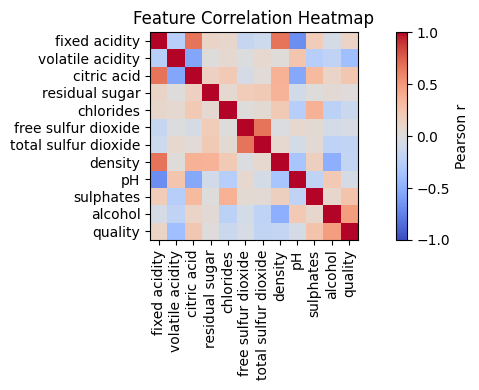

In [9]:
corr = df.corr()
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
ticks = range(len(corr))
labels = corr.columns
plt.xticks(ticks, labels, rotation=90)
plt.yticks(ticks, labels)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Boxplots of Top Features

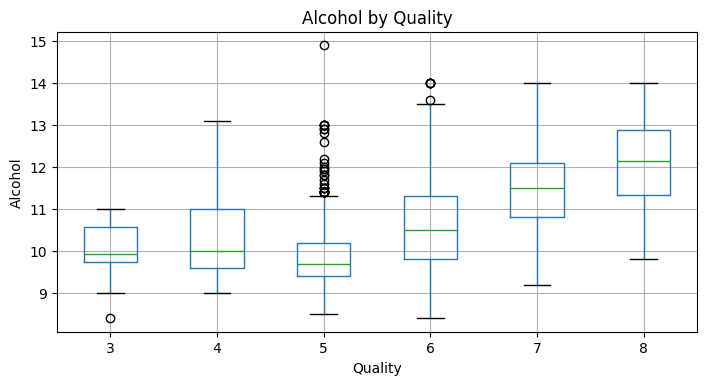

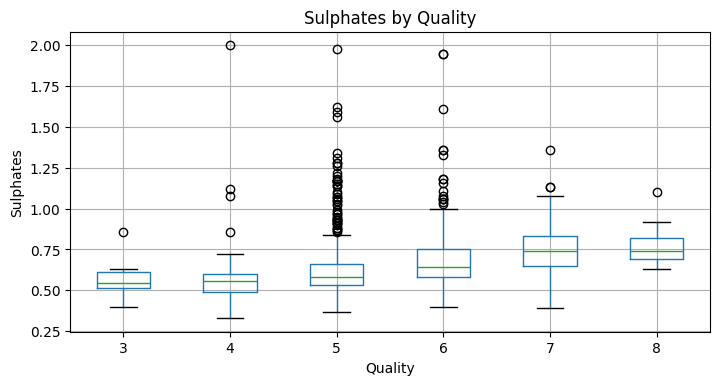

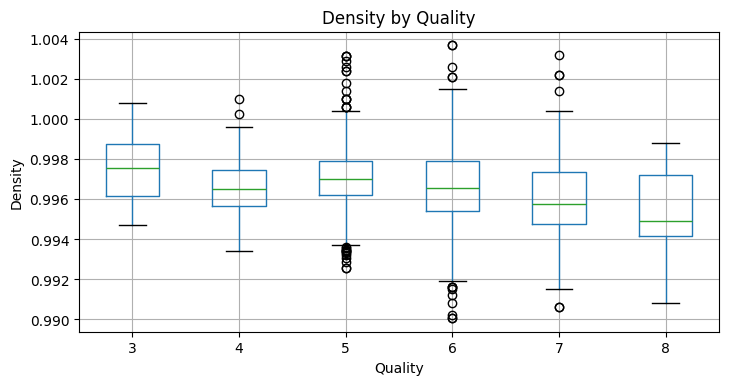

In [10]:
top_feats = ['alcohol','sulphates','density']
for col in top_feats:
    df.boxplot(column=col, by='quality')
    plt.title(f"{col.capitalize()} by Quality")
    plt.suptitle("")  # remove auto‑subtitle
    plt.xlabel("Quality")
    plt.ylabel(col.capitalize())
    plt.show()